In [2]:
%run "E:\Users\puzheng\Documents\Startup_py3.py"
sys.path.append(r"E:\Users\puzheng\Documents")

import ImageAnalysis3 as ia
%matplotlib notebook

from ImageAnalysis3 import *
print(os.getpid())

10920


# 0. required packages for h5py

In [3]:
import h5py
from ImageAnalysis3.classes import _allowed_kwds
import ast

# 1. Create field-of-view class

In [4]:
reload(ia)
reload(classes)
reload(classes.batch_functions)
reload(classes.field_of_view)
reload(io_tools.load)

reload(visual_tools)
reload(ia.correction_tools)
reload(ia.correction_tools.alignment)
reload(ia.spot_tools.matching)
reload(ia.segmentation_tools.chromosome)
reload(ia.spot_tools.fitting)

fov_param = {'data_folder':r'\\10.245.74.158\Chromatin_NAS_6\20200920-B_DMSO_CTP-08_IgH',
             'save_folder':r'I:\Pu_Temp\202009_IgH_proB_DMSO_2color',
             #'save_folder':r'D:\Pu_Temp\202009_IgH_proB_DMSO_2color',
             'experiment_type': 'DNA',
             'num_threads': 24,
             'correction_folder':r'\\10.245.74.158\Chromatin_NAS_0\Corrections\20201012-Corrections_2color',
             'shared_parameters':{
                     'single_im_size':[35,2048,2048],
                     'corr_channels':['750','647'],
                     'num_empty_frames': 0, 
                     'corr_hot_pixel':True,
                     'corr_Z_shift':False,
                     'min_num_seeds':500,
                     'max_num_seeds': 2500,
                     'spot_seeding_th':125,
                     'normalize_intensity_local':True,
                     'normalize_intensity_background':False,
                 },             
             }

fov_ids = np.arange(4,23)

In [5]:
reload(io_tools.load)
from ImageAnalysis3.spot_tools.picking import assign_spots_to_chromosomes
overwrite=False
intensity_th = 0.5

spots_list_list = []
chrom_coords_list = []
cand_chr_spots_list = []

for _fov_id in fov_ids:

    # create fov class
    fov = classes.field_of_view.Field_of_View(fov_param, _fov_id=_fov_id,
                                              _color_info_kwargs={
                                                  '_color_filename':'Color_Usage',
                                              }, 
                                              _prioritize_saved_attrs=False,
                                              )

    # process image into spots
    id_list, spot_list = fov._process_image_to_spots('unique', 
                                                     _load_common_reference=True,
                                                     _load_with_multiple=False,
                                                     _save_images=True,
                                                     _warp_images=False, 
                                                     _overwrite_drift=False,
                                                     _overwrite_image=False,
                                                     _overwrite_spot=overwrite,
                                                     _verbose=True)
    # identify chromosomes
    chrom_im = fov._load_chromosome_image(_overwrite=overwrite)
    chrom_coords = fov._find_candidate_chromosomes_by_segmentation(_filt_size=4, _binary_per_th=99.5, _overwrite=overwrite)
    fov._load_from_file('unique')
    chrom_coords = fov._select_chromosome_by_candidate_spots(
        _good_chr_loss_th=0.25, _overwrite=overwrite,
        _save=True)
    
    # append
    spots_list_list.append(fov.unique_spots_list)
    chrom_coords_list.append(fov.chrom_coords)
    
    fov_cand_chr_spots_list = [[] for _ct in fov.chrom_coords]

    # finalize candidate spots
    for _spots in fov.unique_spots_list:
        _cands_list = assign_spots_to_chromosomes(_spots, fov.chrom_coords)
        for _i, _cands in enumerate(_cands_list):
            fov_cand_chr_spots_list[_i].append(_cands)
            
    cand_chr_spots_list += fov_cand_chr_spots_list
    
    print(f"kept chromosomes: {len(fov.chrom_coords)}")

# combine acquired spots and chromosomes
chrom_coords = np.concatenate(chrom_coords_list)

from ImageAnalysis3.spot_tools.picking import convert_spots_to_hzxys
dna_cand_hzxys_list = [convert_spots_to_hzxys(_spots, fov.shared_parameters['distance_zxy'])
                       for _spots in cand_chr_spots_list]
dna_reg_ids = fov.unique_ids

print(f"{len(chrom_coords)} are found.")

Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 74
- Number of field of views: 64
- Importing csv file: \\10.245.74.158\Chromatin_NAS_6\20200920-B_DMSO_CTP-08_IgH\Analysis\Color_Usage.csv
- header: ['Hyb', '750', '647', '488', '405']
-- Hyb H0R0 exists in this data
-- DAPI exists in hyb: H0R0
- 73 folders are found according to color-usage annotation.
+ loading fov_info from file: I:\Pu_Temp\202009_IgH_proB_DMSO_2color\Conv_zscan_04.hdf5
++ base attributes loaded:['cand_chrom_coords', 'chrom_coords', 'chrom_im', 'ref_im'] in 3.555s.
+ loading correction from file: I:\Pu_Temp\202009_IgH_proB_DMSO_2color\Conv_zscan_04.hdf5
++ load bleed correction profile directly from savefile.
++ load chromatic correction profile directly from savefile.
++ load chromatic_constants correction profile directly from savefile.
++ load illumination correction profile directly from savefile.
+ loading segmentation from file: I:\Pu_Temp\202009_IgH_proB_DMSO_2color\Conv_zscan_04.hdf5
++ ba

-- checking unique, region:[335 333] in 0.009s.
-- checking unique, region:[339 337] in 0.009s.
-- checking unique, region:[342 340] in 0.008s.
-- checking unique, region:[345 343] in 0.009s.
-- checking unique, region:[348 346] in 0.008s.
-- checking unique, region:[351 349] in 0.008s.
-- checking unique, region:[354 352] in 0.008s.
-- checking unique, region:[357 355] in 0.009s.
-- checking unique, region:[360 358] in 0.008s.
-- checking unique, region:[363 361] in 0.009s.
-- checking unique, region:[366 364] in 0.008s.
-- checking unique, region:[369 367] in 0.008s.
-- checking unique, region:[372 370] in 0.008s.
-- checking unique, region:[375 373] in 0.009s.
-- checking unique, region:[379 376] in 0.008s.
-- checking unique, region:[382 380] in 0.008s.
-- checking unique, region:[388 383] in 0.008s.
-- checking unique, region:[391 386] in 0.009s.
-- checking unique, region:[394 389] in 0.008s.
-- checking unique, region:[ 43 392] in 0.009s.
-- checking unique, region:[ 49 395] in 

++ load bleed correction profile directly from savefile.
++ load chromatic correction profile directly from savefile.
++ load chromatic_constants correction profile directly from savefile.
++ load illumination correction profile directly from savefile.
+ loading segmentation from file: I:\Pu_Temp\202009_IgH_proB_DMSO_2color\Conv_zscan_07.hdf5
++ base attributes loaded:[] in 0.008s.
-- saving fov_info to file: I:\Pu_Temp\202009_IgH_proB_DMSO_2color\Conv_zscan_07.hdf5
++ base attributes saved:['analysis_folder', 'annotated_folders', 'bead_channel_index', 'cand_chrom_coords', 'channels', 'chrom_coords', 'chrom_im', 'color_dic', 'color_filename', 'color_format', 'correction_folder', 'dapi_channel_index', 'data_folder', 'drift', 'drift_filename', 'drift_folder', 'experiment_folder', 'folders', 'fov_id', 'fov_name', 'map_folder', 'num_threads', 'ref_filename', 'ref_id', 'ref_im', 'rotation', 'save_filename', 'save_folder', 'segmentation_dim', 'segmentation_folder', 'shared_parameters', 'use_

-- checking unique, region:[357 355] in 0.013s.
-- checking unique, region:[360 358] in 0.012s.
-- checking unique, region:[363 361] in 0.012s.
-- checking unique, region:[366 364] in 0.012s.
-- checking unique, region:[369 367] in 0.012s.
-- checking unique, region:[372 370] in 0.012s.
-- checking unique, region:[375 373] in 0.012s.
-- checking unique, region:[379 376] in 0.012s.
-- checking unique, region:[382 380] in 0.012s.
-- checking unique, region:[388 383] in 0.012s.
-- checking unique, region:[391 386] in 0.012s.
-- checking unique, region:[394 389] in 0.012s.
-- checking unique, region:[ 43 392] in 0.011s.
-- checking unique, region:[ 49 395] in 0.011s.
-- checking unique, region:[55 46] in 0.012s.
-- checking unique, region:[62 52] in 0.012s.
-- checking unique, region:[68 59] in 0.011s.
-- checking unique, region:[74 65] in 0.013s.
-- checking unique, region:[80 71] in 0.012s.
-- checking unique, region:[86 77] in 0.011s.
-- checking unique, region:[92 83] in 0.012s.
-- che

++ load illumination correction profile directly from savefile.
+ loading segmentation from file: I:\Pu_Temp\202009_IgH_proB_DMSO_2color\Conv_zscan_10.hdf5
++ base attributes loaded:[] in 0.009s.
-- saving fov_info to file: I:\Pu_Temp\202009_IgH_proB_DMSO_2color\Conv_zscan_10.hdf5
++ base attributes saved:['analysis_folder', 'annotated_folders', 'bead_channel_index', 'cand_chrom_coords', 'channels', 'chrom_coords', 'chrom_im', 'color_dic', 'color_filename', 'color_format', 'correction_folder', 'dapi_channel_index', 'data_folder', 'drift', 'drift_filename', 'drift_folder', 'experiment_folder', 'folders', 'fov_id', 'fov_name', 'map_folder', 'num_threads', 'ref_filename', 'ref_id', 'ref_im', 'rotation', 'save_filename', 'save_folder', 'segmentation_dim', 'segmentation_folder', 'shared_parameters', 'use_dapi'] in 14.683s.
-- No folder selected, allow processing all 73 folders
-- checking unique, region:[41 42] in 0.015s.
-- checking unique, region:[44 45] in 0.013s.
-- checking unique, reg

-- checking unique, region:[379 376] in 0.010s.
-- checking unique, region:[382 380] in 0.010s.
-- checking unique, region:[388 383] in 0.011s.
-- checking unique, region:[391 386] in 0.010s.
-- checking unique, region:[394 389] in 0.010s.
-- checking unique, region:[ 43 392] in 0.010s.
-- checking unique, region:[ 49 395] in 0.010s.
-- checking unique, region:[55 46] in 0.011s.
-- checking unique, region:[62 52] in 0.010s.
-- checking unique, region:[68 59] in 0.011s.
-- checking unique, region:[74 65] in 0.010s.
-- checking unique, region:[80 71] in 0.011s.
-- checking unique, region:[86 77] in 0.010s.
-- checking unique, region:[92 83] in 0.010s.
-- checking unique, region:[98 89] in 0.011s.
-- checking unique, region:[104  95] in 0.010s.
-- checking unique, region:[110 101] in 0.011s.
-- checking unique, region:[325 107] in 0.010s.
-- checking unique, region:[331 113] in 0.010s.
-- checking unique, region:[341 328] in 0.011s.
-- checking unique, region:[347 334] in 0.010s.
-- check

-- No folder selected, allow processing all 73 folders
-- checking unique, region:[41 42] in 0.013s.
-- checking unique, region:[44 45] in 0.011s.
-- checking unique, region:[47 48] in 0.010s.
-- checking unique, region:[50 51] in 0.052s.
-- checking unique, region:[53 54] in 0.011s.
-- checking unique, region:[56 57] in 0.011s.
-- checking unique, region:[60 61] in 0.011s.
-- checking unique, region:[63 64] in 0.011s.
-- checking unique, region:[66 67] in 0.011s.
-- checking unique, region:[69 70] in 0.011s.
-- checking unique, region:[72 73] in 0.011s.
-- checking unique, region:[75 76] in 0.011s.
-- checking unique, region:[78 79] in 0.011s.
-- checking unique, region:[81 82] in 0.011s.
-- checking unique, region:[84 85] in 0.011s.
-- checking unique, region:[87 88] in 0.011s.
-- checking unique, region:[90 91] in 0.011s.
-- checking unique, region:[93 94] in 0.011s.
-- checking unique, region:[96 97] in 0.011s.
-- checking unique, region:[ 99 100] in 0.011s.
-- checking unique, reg

+ directly use current chromsome coordinates.
+ loading unique from file: I:\Pu_Temp\202009_IgH_proB_DMSO_2color\Conv_zscan_14.hdf5
++ finish loading unique in 0.047s. 
+ directly use current chromsome coordinates.
kept chromosomes: 408
Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 74
- Number of field of views: 64
- Importing csv file: \\10.245.74.158\Chromatin_NAS_6\20200920-B_DMSO_CTP-08_IgH\Analysis\Color_Usage.csv
- header: ['Hyb', '750', '647', '488', '405']
-- Hyb H0R0 exists in this data
-- DAPI exists in hyb: H0R0
- 73 folders are found according to color-usage annotation.
+ loading fov_info from file: I:\Pu_Temp\202009_IgH_proB_DMSO_2color\Conv_zscan_15.hdf5
++ base attributes loaded:['cand_chrom_coords', 'chrom_coords', 'chrom_im', 'ref_im'] in 3.707s.
+ loading correction from file: I:\Pu_Temp\202009_IgH_proB_DMSO_2color\Conv_zscan_15.hdf5
++ load bleed correction profile directly from savefile.
++ load chromatic correction profile directly from savef

-- checking unique, region:[108 109] in 0.011s.
-- checking unique, region:[111 112] in 0.011s.
-- checking unique, region:[114 115] in 0.011s.
-- checking unique, region:[323 321] in 0.011s.
-- checking unique, region:[326 324] in 0.011s.
-- checking unique, region:[329 327] in 0.010s.
-- checking unique, region:[332 330] in 0.011s.
-- checking unique, region:[335 333] in 0.011s.
-- checking unique, region:[339 337] in 0.011s.
-- checking unique, region:[342 340] in 0.011s.
-- checking unique, region:[345 343] in 0.010s.
-- checking unique, region:[348 346] in 0.010s.
-- checking unique, region:[351 349] in 0.010s.
-- checking unique, region:[354 352] in 0.010s.
-- checking unique, region:[357 355] in 0.010s.
-- checking unique, region:[360 358] in 0.011s.
-- checking unique, region:[363 361] in 0.010s.
-- checking unique, region:[366 364] in 0.010s.
-- checking unique, region:[369 367] in 0.010s.
-- checking unique, region:[372 370] in 0.010s.
-- checking unique, region:[375 373] in 

++ base attributes loaded:['cand_chrom_coords', 'chrom_coords', 'chrom_im', 'ref_im'] in 3.682s.
+ loading correction from file: I:\Pu_Temp\202009_IgH_proB_DMSO_2color\Conv_zscan_18.hdf5
++ load bleed correction profile directly from savefile.
++ load chromatic correction profile directly from savefile.
++ load chromatic_constants correction profile directly from savefile.
++ load illumination correction profile directly from savefile.
+ loading segmentation from file: I:\Pu_Temp\202009_IgH_proB_DMSO_2color\Conv_zscan_18.hdf5
++ base attributes loaded:[] in 0.009s.
-- saving fov_info to file: I:\Pu_Temp\202009_IgH_proB_DMSO_2color\Conv_zscan_18.hdf5
++ base attributes saved:['analysis_folder', 'annotated_folders', 'bead_channel_index', 'cand_chrom_coords', 'channels', 'chrom_coords', 'chrom_im', 'color_dic', 'color_filename', 'color_format', 'correction_folder', 'dapi_channel_index', 'data_folder', 'drift', 'drift_filename', 'drift_folder', 'experiment_folder', 'folders', 'fov_id', 'fo

-- checking unique, region:[366 364] in 0.011s.
-- checking unique, region:[369 367] in 0.010s.
-- checking unique, region:[372 370] in 0.011s.
-- checking unique, region:[375 373] in 0.011s.
-- checking unique, region:[379 376] in 0.011s.
-- checking unique, region:[382 380] in 0.011s.
-- checking unique, region:[388 383] in 0.011s.
-- checking unique, region:[391 386] in 0.011s.
-- checking unique, region:[394 389] in 0.011s.
-- checking unique, region:[ 43 392] in 0.011s.
-- checking unique, region:[ 49 395] in 0.010s.
-- checking unique, region:[55 46] in 0.011s.
-- checking unique, region:[62 52] in 0.011s.
-- checking unique, region:[68 59] in 0.010s.
-- checking unique, region:[74 65] in 0.010s.
-- checking unique, region:[80 71] in 0.011s.
-- checking unique, region:[86 77] in 0.011s.
-- checking unique, region:[92 83] in 0.011s.
-- checking unique, region:[98 89] in 0.011s.
-- checking unique, region:[104  95] in 0.011s.
-- checking unique, region:[110 101] in 0.011s.
-- check

++ base attributes saved:['analysis_folder', 'annotated_folders', 'bead_channel_index', 'cand_chrom_coords', 'channels', 'chrom_coords', 'chrom_im', 'color_dic', 'color_filename', 'color_format', 'correction_folder', 'dapi_channel_index', 'data_folder', 'drift', 'drift_filename', 'drift_folder', 'experiment_folder', 'folders', 'fov_id', 'fov_name', 'map_folder', 'num_threads', 'ref_filename', 'ref_id', 'ref_im', 'rotation', 'save_filename', 'save_folder', 'segmentation_dim', 'segmentation_folder', 'shared_parameters', 'use_dapi'] in 14.748s.
-- No folder selected, allow processing all 73 folders
-- checking unique, region:[41 42] in 0.011s.
-- checking unique, region:[44 45] in 0.010s.
-- checking unique, region:[47 48] in 0.009s.
-- checking unique, region:[50 51] in 0.009s.
-- checking unique, region:[53 54] in 0.009s.
-- checking unique, region:[56 57] in 0.009s.
-- checking unique, region:[60 61] in 0.009s.
-- checking unique, region:[63 64] in 0.009s.
-- checking unique, region:[6

-- checking unique, region:[68 59] in 0.011s.
-- checking unique, region:[74 65] in 0.012s.
-- checking unique, region:[80 71] in 0.011s.
-- checking unique, region:[86 77] in 0.011s.
-- checking unique, region:[92 83] in 0.011s.
-- checking unique, region:[98 89] in 0.011s.
-- checking unique, region:[104  95] in 0.011s.
-- checking unique, region:[110 101] in 0.011s.
-- checking unique, region:[325 107] in 0.011s.
-- checking unique, region:[331 113] in 0.011s.
-- checking unique, region:[341 328] in 0.011s.
-- checking unique, region:[347 334] in 0.011s.
-- checking unique, region:[353 344] in 0.011s.
-- checking unique, region:[359 350] in 0.011s.
-- checking unique, region:[365 356] in 0.011s.
-- checking unique, region:[371 362] in 0.010s.
-- checking unique, region:[377 368] in 0.011s.
-- checking unique, region:[384 374] in 0.011s.
-- checking unique, region:[390 381] in 0.011s.
-- checking unique, region:[393 387] in 0.011s.
directly return existing attribute.
+ directly use c

In [6]:
# select_hzxys close to the chromosome center
dist_th = 3000 # upper limit is 5000nm
intensity_th = 0.5
sel_dna_cand_hzxys_list = []
for _cand_hzxys, _chrom_coord in zip(dna_cand_hzxys_list, chrom_coords):
    _sel_cands_list = []
    
    for _cands in _cand_hzxys:
        if len(_cands) == 0:
            _sel_cands_list.append([])
        else:
            _dists = np.linalg.norm(_cands[:,1:4] - _chrom_coord*np.array([200,108,108]), axis=1)
            _sel_cands_list.append(_cands[(_dists < dist_th) & (_cands[:,0]>=intensity_th)])
            
    # append
    sel_dna_cand_hzxys_list.append(_sel_cands_list)

### EM pick spots

- iter:0
- generate reference metrics from picked chrs.
-- multiprocessing process references with 24 threads, in 30.075s
-- collapse all regions into 1d.


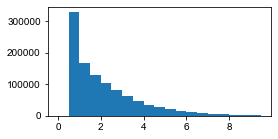

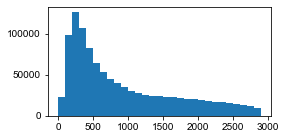

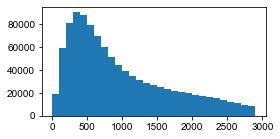

- start EM picking.
-- directly use given reference.
-- multiprocessing maximization step with 24 threads, in 33.762s


E:\Users\puzheng\Documents\ImageAnalysis3\spot_tools\picking.py:1995: RuntimeWarning: invalid value encountered in less
  return np.sum(diffs < 0.01) / np.sum(np.isnan(diffs)==False)


-- region kept: 0.8345
- iter:1
- generate reference metrics from picked chrs.
-- multiprocessing process references with 24 threads, in 28.708s
-- collapse all regions into 1d.


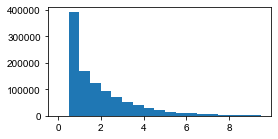

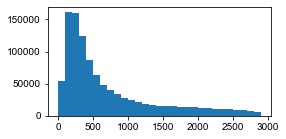

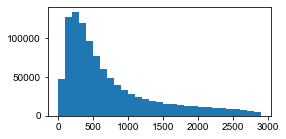

- start EM picking.
-- directly use given reference.
-- multiprocessing maximization step with 24 threads, in 32.993s
-- region kept: 0.9741
- iter:2
- generate reference metrics from picked chrs.
-- multiprocessing process references with 24 threads, in 29.572s
-- collapse all regions into 1d.


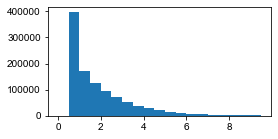

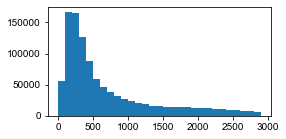

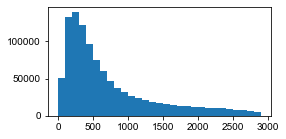

- start EM picking.
-- directly use given reference.
-- multiprocessing maximization step with 24 threads, in 32.843s
-- region kept: 0.9929
- iter:3
- generate reference metrics from picked chrs.
-- multiprocessing process references with 24 threads, in 30.096s
-- collapse all regions into 1d.


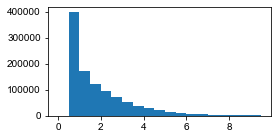

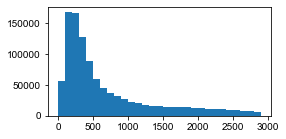

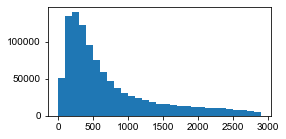

- start EM picking.
-- directly use given reference.
-- multiprocessing maximization step with 24 threads, in 32.804s
-- region kept: 0.9963


In [7]:
# load functions
reload(ia.spot_tools.picking)
from ImageAnalysis3.spot_tools.picking import Pick_spots_by_intensity, EM_pick_scores_in_population, generate_reference_from_population,evaluate_differences

%matplotlib inline
niter= 10
nkeep = len(sel_dna_cand_hzxys_list)
num_threads = fov.num_threads
# initialize
init_dna_hzxys = Pick_spots_by_intensity(sel_dna_cand_hzxys_list[:nkeep])
# set save list
sel_dna_hzxys_list, sel_dna_scores_list, all_dna_scores_list = [init_dna_hzxys], [], []
for _iter in range(niter):
    print(f"- iter:{_iter}")
    # generate reference
    ref_ct_dists, ref_local_dists, ref_ints = generate_reference_from_population(
        sel_dna_hzxys_list[-1], dna_reg_ids, 
        sel_dna_hzxys_list[-1][:nkeep], dna_reg_ids,
        num_threads=num_threads,
        collapse_regions=True,
    )
    plt.figure(figsize=(4,2))
    plt.hist(np.ravel(ref_ints), bins=np.arange(0,10,0.5))
    plt.figure(figsize=(4,2))
    plt.hist(np.ravel(ref_ct_dists), bins=np.arange(0,3000,100))
    plt.figure(figsize=(4,2))
    plt.hist(np.ravel(ref_local_dists), bins=np.arange(0,3000,100))
    plt.show()
    # scoring
    sel_hzxys, sel_scores, all_scores = EM_pick_scores_in_population(
            sel_dna_cand_hzxys_list[:nkeep], dna_reg_ids, sel_dna_hzxys_list[-1], 
            ref_ct_dists, ref_local_dists, ref_ints,
            sel_dna_hzxys_list[-1], dna_reg_ids, num_threads=num_threads,
        )
    update_rate = evaluate_differences(sel_hzxys, sel_dna_hzxys_list[-1])
    print(f"-- region kept: {update_rate:.4f}")
    sel_dna_hzxys_list.append(sel_hzxys)
    sel_dna_scores_list.append(sel_scores)
    all_dna_scores_list.append(all_scores)
    
    if update_rate > 0.995:
        break

<IPython.core.display.Javascript object>


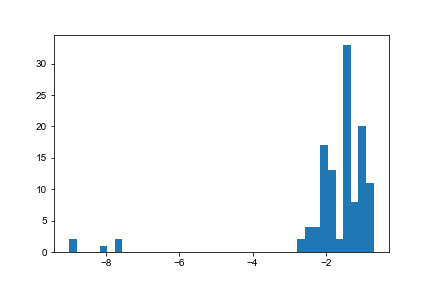

E:\Users\puzheng\AppData\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
E:\Users\puzheng\AppData\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


In [27]:
plt.figure()
plt.hist(np.log(sel_dna_scores_list[sel_iter][1]), 40)
plt.show()

In [8]:
from scipy.spatial.distance import pdist, squareform
sel_iter = -1

final_dna_hzxys_list = []
distmap_list = []
score_th = np.exp(-3)
bad_spot_percentage = 0.5
for _hzxys, _scores in zip(sel_dna_hzxys_list[sel_iter], sel_dna_scores_list[sel_iter]):
    _kept_hzxys = np.array(_hzxys).copy()
    _kept_hzxys[_scores < score_th] = np.nan
    if np.mean(np.isnan(_kept_hzxys).sum(1)>0)<bad_spot_percentage:
        final_dna_hzxys_list.append(_kept_hzxys)
        distmap_list.append(squareform(pdist(_kept_hzxys[:,1:4])))

distmap_list = np.array(distmap_list)
median_distmap = np.nanmedian(distmap_list, axis=0)

E:\Users\puzheng\AppData\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in less
  # Remove the CWD from sys.path while we load stuff.


0.2541576283441793


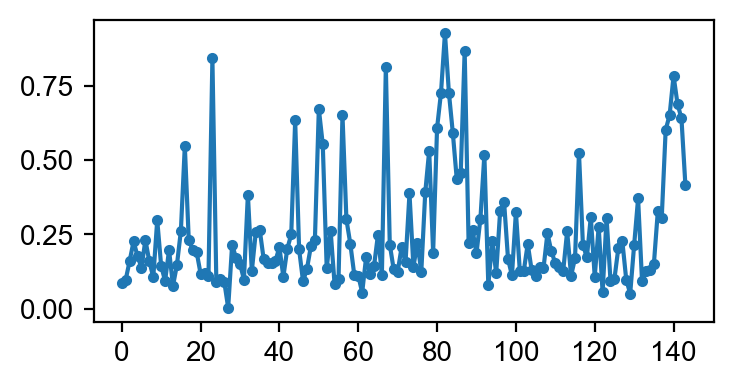

In [9]:
loss_rates = np.mean(np.sum(np.isnan(final_dna_hzxys_list), axis=2)>0, axis=0)
print(np.mean(loss_rates))
fig, ax = plt.subplots(figsize=(4,2),dpi=200)
ax.plot(loss_rates, '.-')
ax.set_xticks(np.arange(0,150,20))
plt.show()

In [10]:
kept_inds = np.where(loss_rates<0.25)[0]

<IPython.core.display.Javascript object>


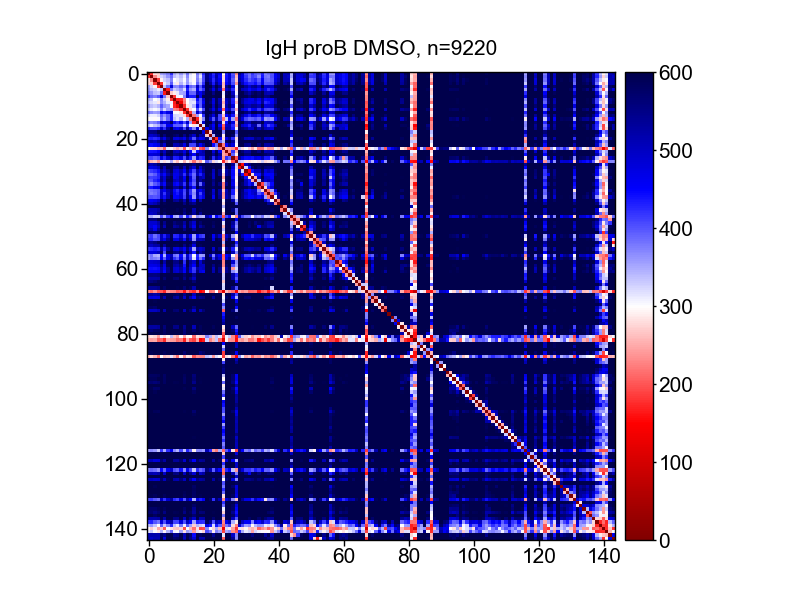

In [15]:
fig, ax = plt.subplots(figsize=(4,3),dpi=200)
ax = ia.figure_tools.distmap.plot_distance_map(median_distmap,
                                               #median_distmap[kept_inds][:,kept_inds], 
                                               color_limits=[0,600],
                                               ax=ax,
                                               ticks=np.arange(0,150,20), 
                                               figure_dpi=200)
ax.set_title(f"IgH proB DMSO, n={len(distmap_list)}", fontsize=7.5)
plt.gcf().subplots_adjust(bottom=0.1)
plt.show()

## visualize single example

<IPython.core.display.Javascript object>


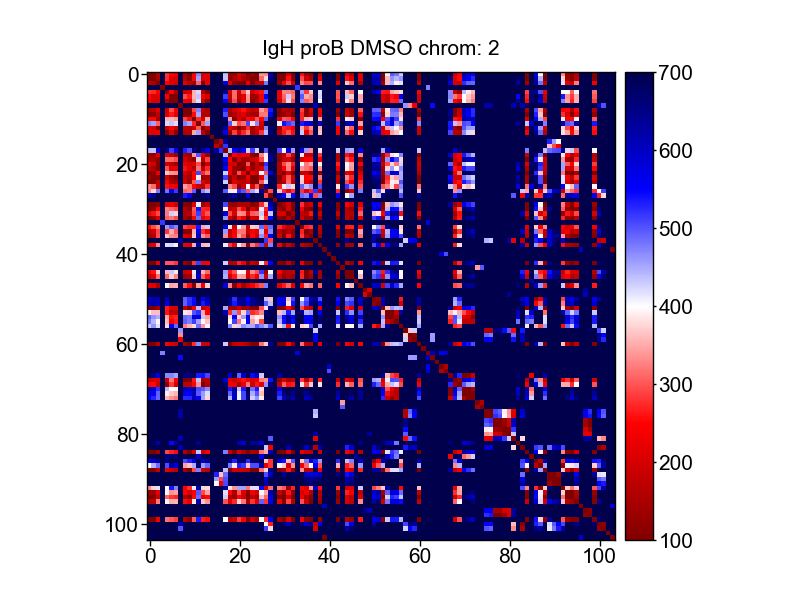

<IPython.core.display.Javascript object>


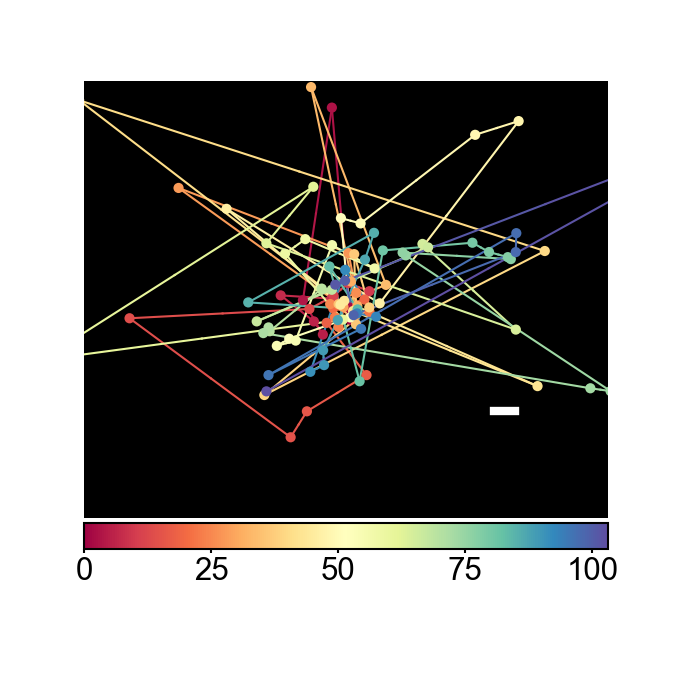

-- add colorbar with colornorm: <matplotlib.colors.Normalize object at 0x00000248BEAC8188>


In [16]:
%matplotlib notebook

chrom_id = 2

valid_inds = np.where(np.isnan(final_dna_hzxys_list[chrom_id]).sum(1) == 0)[0]

fig, ax = plt.subplots(figsize=(4,3),dpi=200)
ax = ia.figure_tools.distmap.plot_distance_map(#distmap_list[chrom_id],
                                               distmap_list[chrom_id][valid_inds][:,valid_inds], 
                                               color_limits=[100,700],
                                               ax=ax,
                                               ticks=np.arange(0,150,20), 
                                               figure_dpi=200)
ax.set_title(f"IgH proB DMSO chrom: {chrom_id}", fontsize=7.5)
plt.gcf().subplots_adjust(bottom=0.1)
plt.show()



reload(figure_tools.image)
ax3d = figure_tools.image.chromosome_structure_3d_rendering(#final_dna_hzxys_list[chrom_id][:,1:], 
                                                     final_dna_hzxys_list[chrom_id][valid_inds, 1:], 
                                                     marker_edge_line_width=0,
                                                     reference_bar_length=100, image_radius=600, 
                                                     line_width=0.5, figure_dpi=300, depthshade=False)
plt.show()

# Save

In [13]:
output_folder = r'\\10.245.74.158\Chromatin_NAS_6\20201031-processed_matrix'

np.save(os.path.join(output_folder, '20200920_proB_DMSO'), distmap_list)